In [1]:
! pip freeze | grep -E "notebook|geo|altair|matplot|seaborn|folium|geo"

altair==1.2.0
folium==0.3.0
geopandas==0.2.1
geopy==1.11.0
matplotlib==1.4.3
notebook==5.0.0
pygeocoder==1.2.5
pygeocodio==0.5.0
seaborn==0.7.1


In [81]:
import re, os
import numpy as np
import pandas as pd
from altair import Chart, load_dataset, X, Y, Color, Axis, Legend, Scale, SortField

from geocodio import GeocodioClient
geocodio_api_key = os.getenv('GEOCODIO_API_KEY')
client = GeocodioClient(geocodio_api_key)



In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [4]:
#  dtype={'Funding': np.float64},
kyf2 = pd.read_excel('KYF2 new compass data 2015.xls', na_values="No Data",
                     skip_footer=2, encoding='xlrd', parse_dates=['Year'])
print len(kyf2), 'records'
kyf2.head(2)

4185 records


,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Beef,Alcohol,Bees,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pd.options.display.float_format = '${:,.0f}'.format
amount = kyf2.Funding.sum()
print 'Know Your Farmer, Know Your Food \nGrants and Loans 2009–2014\n',  'TOTAL: ', kyf2.Funding.sum()

amount

Know Your Farmer, Know Your Food 
Grants and Loans 2009–2014
TOTAL:  574277980.457


574277980.45700002

In [8]:
pd.options.display.float_format = None

In [9]:
print '--- Count by Year ---'
print kyf2.Year.value_counts().sort_index()

print '--- Count by Funding_Ty value ---'
print kyf2.Funding_Ty.value_counts().sort_index()



--- Count by Year ---
2009-01-01    533
2010-01-01    731
2011-01-01    778
2012-01-01    657
2013-01-01    509
2014-01-01    977
Name: Year, dtype: int64
--- Count by Funding_Ty value ---
Grant     4059
Grants       4
Loan       121
grant        1
Name: Funding_Ty, dtype: int64


In [10]:
kyf2.head(2)

,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Beef,Alcohol,Bees,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
incorrect_spellings =['Small and Socially Disadvantaged Producer Grants']
correct_spellings = ['Small Socially Disadvantaged Producer Grants']
corrections = pd.Series(data=correct_spellings, index=incorrect_spellings)

kyf2.replace(corrections, inplace=True)
kyf2[kyf2.Name.str.startswith('Small')]


,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Beef,Alcohol,Bees,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding
60,Alabama State Association of Cooperatives,Small Socially Disadvantaged Producer Grants,SSDPG,2011-01-01,"36740, Forkland, AL",AL,Forkland,36740,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,California Center for Cooperative Development,Small Socially Disadvantaged Producer Grants,SSDPG,2012-01-01,"95616, Davis, CA",CA,Davis,95616,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,Arkansas Valley Organic Growers,Small Socially Disadvantaged Producer Grants,SSDPG,2010-01-01,"Fowler, CO",CO,Fowler,,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,"Southwest Development Center, Inc.",Small Socially Disadvantaged Producer Grants,SSDPG,2014-01-01,7900 East Union Ave,CO,DENVER,80237,RBCS,Rural Development,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,Solar Refrigeration,Small Business Innovation Research,SBIR,2014-01-01,68 Winterhill Road,CT,Madison,06443,NIFA,"Research, Education and Economics",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,Use of Hydroponic and LED Technology to Grow H...,Small Business Innovation Research,SBIR,2011-01-01,"06850, Norwalk, CT",CT,Norwalk,06850,NIFA,"Research, Education and Economics",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
841,Aquaculture,Small Business Innovation Research,SBIR,2014-01-01,824 Gulick Ave.,HI,Honolulu,96819,NIFA,"Research, Education and Economics",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,Value-Added Multi-Purpose Processing Establish...,Small Business Innovation Research,SBIR,2010-01-01,"46035, Colfax, IN",IN,Colfax,46035,NIFA,"Research, Education and Economics",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,A CSA Model to Bring Locally Grown Foods to th...,Small Business Innovation Research,SBIR,2009-01-01,"66716, Bronson, KS",KS,Bronson,66716,NIFA,"Research, Education and Economics",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1318,Production and Marketing of a Novelty Specialt...,Small Business Innovation Research,SBIR,2011-01-01,"42544, Nancy, KY",KY,Nancy,42544,NIFA,"Research, Education and Economics",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


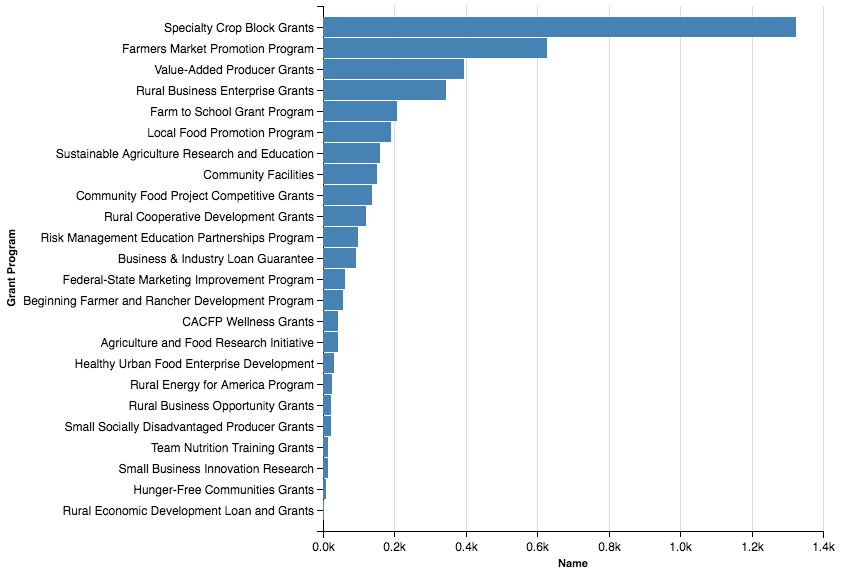

In [12]:
grantor = pd.DataFrame(kyf2['Name'].value_counts())
grantor.reset_index(inplace=True)
Chart(grantor).mark_bar()
.encode(y=Y('index:N', sort=SortField(field='Name', order='ascending'),
        axis=Axis(title='Grant Program')), x='Name:Q')
.configure_axis(tickLabelFontSize=12, labelMaxLength=300)

In [16]:
described = kyf2.describe()
counts = described.iloc[0:1,3:]
counts[counts.columns] = counts[counts.columns].astype(int)
count_df = counts.T.sort_values('count')
count_df.reset_index(inplace=True)
print count_df


                index  count
0                Bees     18
1            Soilless     21
2         Blueberries     27
3            Heritage     31
4                Beef     67
5       Logo/Branding     75
6             Tourism     82
7        Food Deserts     85
8             Alcohol    112
9   Beginning Farmers    129
10            Organic    130
11            Cooking    207
12              Youth    510


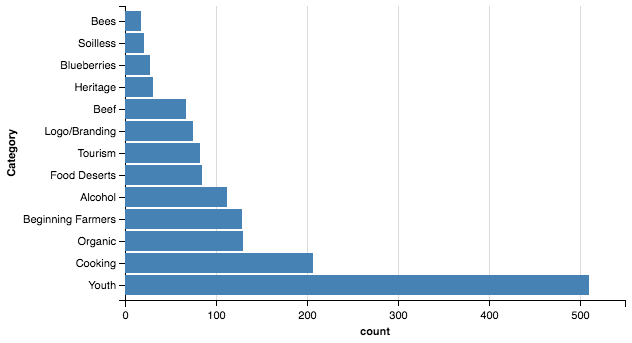

In [23]:
# unsorted version: Chart(count_df).mark_bar().encode(y='index', x='count')

Chart(count_df).mark_bar().encode(y=Y('index:N', sort=SortField(field='count', order='ascending', op='sum'),
        axis=Axis(title='Category')), x='count')
   


In [24]:
# convert categories to boolean values
bool_columns = ['Cooking','Tourism','Food Deserts','Beef','Alcohol','Bees','Youth',
                'Beginning Farmers','Organic','Blueberries', 'Heritage','Soilless','Logo/Branding']
kyf2[bool_columns] = kyf2[bool_columns].fillna(value=0)
kyf2[bool_columns] = kyf2[bool_columns].astype(int)


Grants vs. Loans

In [25]:
# create a new column that normalizes the funding type

# this regular expression finds "Grant", "grant" and "Grants"
grantre = re.compile('grant.?', re.IGNORECASE)
# np.where(re.match(grantre, kyf2.Funding_Ty))
# kyf2.Funding_Ty.to_replace(grantre, "Grant")


kyf2['grant'] = np.where(kyf2.Funding_Ty.str.contains(grantre), 1,0)
print "Grants: ", sum(kyf2['grant'])
kyf2['loan'] = np.where(kyf2.Funding_Ty.str.contains('Loan'), 1,0)
print "Loans: ", sum(kyf2['loan'])
kyf2['grant_loan'] = np.where(kyf2.Funding_Ty.str.contains(grantre), "Grant","")
kyf2['grant_loan'] = np.where(kyf2.Funding_Ty.str.contains("Loan"), "Loan",kyf2['grant_loan'])
kyf2['grant_loan'].value_counts(dropna=False)
kyf2[['Funding_Ty','grant_loan']].sample(20).head(20)

Grants:  4064
Loans:  121


,Funding_Ty,grant_loan
1701,Grant,Grant
308,Grant,Grant
2582,Grant,Grant
2569,Grant,Grant
627,Grant,Grant
1615,Grant,Grant
1442,Grant,Grant
1146,Grant,Grant
3097,Grant,Grant
713,Grant,Grant


In [26]:
funding_bar_data = kyf2[['Funding','Year', 'grant_loan']].copy()

# pd.set_option('display.float_format', lambda x: '$%.0f' % x)
pd.options.display.float_format = '${:,.0f}'.format
print funding_bar_data.groupby(['Year','grant_loan']).sum()

                          Funding
Year       grant_loan            
2009-01-01 Grant      $40,178,873
           Loan        $8,514,000
2010-01-01 Grant      $68,722,840
           Loan       $40,501,736
2011-01-01 Grant      $71,393,993
           Loan       $44,840,919
2012-01-01 Grant      $63,616,001
           Loan       $11,232,500
2013-01-01 Grant      $44,199,998
           Loan       $44,532,900
2014-01-01 Grant      $76,778,294
           Loan       $59,765,927


In [27]:
pd.options.display.float_format = None

In [28]:
grants_chart = Chart(funding_bar_data).mark_bar( barSize=25).encode(
    color=Color('grant_loan',
        legend=Legend(
            title='Legend',
        ),
        scale=Scale(
            domain=['Loan', 'Grant'],
            range=['salmon', '#1f77b4'],
        )
    ),
    x=X('Year:T',
        axis=Axis(
            title='Year',
        ),
        timeUnit='year',
    ),
    y='sum(Funding):Q',
).configure_cell(
    height=200,
    width=210
).configure_scale(bandSize=500)

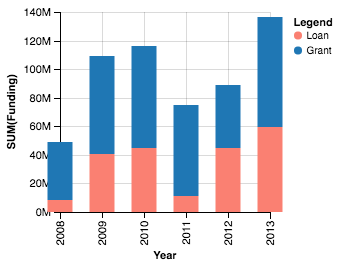

In [29]:
grants_chart

In [30]:
grants_count_chart = Chart(funding_bar_data).mark_bar( barSize=25).encode(
    color=Color('grant_loan',
        legend=Legend(
            title='Legend',
        ),
        scale=Scale(
            domain=['Loan', 'Grant'],
            range=['salmon', '#1f77b4'],
        )
    ),
    x=X('Year:T',
        axis=Axis(
            title='Year',
        ),
        timeUnit='year',
    ),
    y='count(Funding):Q',
).configure_cell(
    height=200,
    width=210
).configure_scale(bandSize=500)

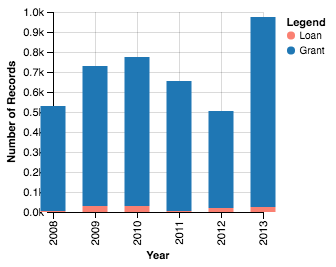

In [31]:
grants_count_chart

In [32]:
# rename columns
kyf2.rename(columns={'X': 'lon', 'Y':'lat'}, inplace=True)
# kyf2.reset_index(inplace=True)
# kyf_for_geocodio = kyf2[['index',  'lat', 'lon', 'Address', 'State', 'Town', 'Zip']]
# kyf_for_geocodio.to_csv('kyf2latlon1.csv', encoding='utf-8')


Drop blank Funding values

In [33]:

# kyf2['Funding'].hasnans
# nan_rows = kyf2[kyf2.Funding.isnull()]
# nanFunding_rows = kyf2.Funding.dropna(axis=0, inplace=True)
# nanFunding_rows
# print kyf2.sample(6).iloc[:, 10:-10:].head(12)

# kyf2 = kyf2[pd.notnull(kyf2['Funding'])]
# pd.notnull(kyf2['Funding'])

# determine if Funding row has null values
print np.where(pd.isnull(kyf2.Funding)), 'zero value for funding'

# Drop the nine records with no data for Funding
kyf2 = kyf2.dropna(subset=['Funding'])


(array([1014, 1707, 1922, 2436, 2836, 2995, 3494, 3513, 3938]),) zero value for funding


In [34]:
# create a file of all the awardees that were not geocoded
lon_zero = kyf2[kyf2['lon'].round(decimals=1)==0.0]
lon_zero.to_csv('lon_zero.csv', encoding='utf-8')
len(lon_zero)


31

In [35]:
# import the dataset of ungeocoded records
lon_zero4geocoding = pd.read_csv('lon_zero.csv', encoding='utf-8')
lon_zero4geocoding['Zip'] = lon_zero4geocoding.Zip.astype(str)
lon_zero4geocoding

,Unnamed: 0,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,...,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding,grant,loan,grant_loan
0,156,"Healthy Eating, Healthy Living Program",Specialty Crop Block Grants,SCBG,2014-01-01,"Executive Office Building, Utulei",AS,Pago Pago,96799,AMS,...,0,0,0,0,0,0,0,1,0,Grant
1,157,Import Substitution Initiative (Specialty Crops),Specialty Crop Block Grants,SCBG,2013-01-01,"Executive Office Building, Utulei",AS,Pago Pago,96799,AMS,...,1,0,0,0,0,0,0,1,0,Grant
2,209,Southern Arizona Beekeeping and Honey Promotio...,Local Food Promotion Program,LFPP,2014-01-01,"4526 N. Anway, Rd.",AZ,Marana,85753,AMS,...,0,0,0,0,0,0,0,1,0,Grant
3,578,Sweetgrass Cooperative,Value-Added Producer Grants,VAPG,2011-01-01,"81223, Cotopaxi, CO",CO,Hillside,82132,RBCS,...,0,0,0,0,0,0,0,1,0,Grant
4,596,Downtown Norwich Farmer’s Market Operation Hea...,Farmers Market Promotion Program,FMPP,2014-01-01,77 Main Street,CT,Norwich,63605,AMS,...,0,0,0,0,0,0,0,1,0,Grant
5,603,"Hartford Mobile Market--Bringing Fresh, Local ...",Local Food Promotion Program,LFPP,2014-01-01,1 Congress Street,CT,Hartford,61141,AMS,...,0,0,0,0,0,0,0,1,0,Grant
6,613,Noank Community Market Local Meat Initiative,Local Food Promotion Program,LFPP,2014-01-01,17 Pearl Street,CT,Groton,63405,AMS,...,0,0,0,0,0,0,0,1,0,Grant
7,834,Education and Training of Local Workforce Thro...,Specialty Crop Block Grants,SCBG,2014-01-01,163 Diary Road,GU,Mangilao,96913,AMS,...,0,0,0,0,0,0,0,1,0,Grant
8,835,In Vitro Propagation Of Dendrobium And Phalaen...,Specialty Crop Block Grants,SCBG,2013-01-01,163 Dairy Road,GU,Mangilao,96913,AMS,...,0,0,0,0,0,0,0,1,0,Grant
9,837,"Quick Service Foods, Inc.",Business & Industry Loan Guarantee,B & I,2014-01-01,"1779 Army Drive, Suite 104",GU,Tamuning,96913,RBCS,...,0,0,0,0,0,0,0,0,1,Loan


In [36]:
address_cols = ['Unnamed: 0','Address','Town','State','Zip']
df = lon_zero4geocoding[address_cols]
df.reset_index(inplace=True)
df['full_address'] =  df['Address'] \
+", " + df['Town'] + ", " \
+ df['State'] + " " \
+ df['Zip']
df


/Users/marjorieroswell/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,Unnamed: 0,Address,Town,State,Zip,full_address
0,0,156,"Executive Office Building, Utulei",Pago Pago,AS,96799,"Executive Office Building, Utulei, Pago Pago, ..."
1,1,157,"Executive Office Building, Utulei",Pago Pago,AS,96799,"Executive Office Building, Utulei, Pago Pago, ..."
2,2,209,"4526 N. Anway, Rd.",Marana,AZ,85753,"4526 N. Anway, Rd., Marana, AZ 85753"
3,3,578,"81223, Cotopaxi, CO",Hillside,CO,82132,"81223, Cotopaxi, CO, Hillside, CO 82132"
4,4,596,77 Main Street,Norwich,CT,63605,"77 Main Street, Norwich, CT 63605"
5,5,603,1 Congress Street,Hartford,CT,61141,"1 Congress Street, Hartford, CT 61141"
6,6,613,17 Pearl Street,Groton,CT,63405,"17 Pearl Street, Groton, CT 63405"
7,7,834,163 Diary Road,Mangilao,GU,96913,"163 Diary Road, Mangilao, GU 96913"
8,8,835,163 Dairy Road,Mangilao,GU,96913,"163 Dairy Road, Mangilao, GU 96913"
9,9,837,"1779 Army Drive, Suite 104",Tamuning,GU,96913,"1779 Army Drive, Suite 104, Tamuning, GU 96913"


In [37]:
#extract for list of index numbers for geocoding
lon_zero_list = df.iloc[:, -1].tolist()
lon_zero_list
# geocode the awardees that had a longitude of 0
geocoded = client.geocode(lon_zero_list)
geocoded


[{u'input': {u'address_components': {u'city': u'Pago Pago',
    u'country': u'US',
    u'state': u'AS',
    u'zip': u'96799'},
   u'formatted_address': u'Pago Pago, AS 96799'},
  u'results': [{u'accuracy': 0.8,
    u'accuracy_type': u'place',
    u'address_components': {u'city': u'Pago Pago',
     u'country': u'US',
     u'county': u'Eastern District',
     u'state': u'AS',
     u'zip': u'96799'},
    u'formatted_address': u'Pago Pago, AS 96799',
    u'location': {u'lat': -14.278056, u'lng': -170.7025},
    u'source': u'TIGER/Line\xae dataset from the US Census Bureau'},
   {u'accuracy': 0.6,
    u'accuracy_type': u'place',
    u'address_components': {u'city': u"Faga'itua",
     u'country': u'US',
     u'county': u'Eastern District',
     u'state': u'AS',
     u'zip': u'96799'},
    u'formatted_address': u"Faga'itua, AS 96799",
    u'location': {u'lat': -14.271944, u'lng': -170.611944},
    u'source': u'TIGER/Line\xae dataset from the US Census Bureau'},
   {u'accuracy': 0.6,
    u'acc

In [39]:
# Create a DataFrame of latitudes and longitudes
#   in the same order as the original extracted list
awardee_geocodes = {}
counter = 0
for awardee in geocoded:
    awardee_geocodes[counter] = {}
    results = awardee.values()[1][0]
    latitude = results['location']['lat']
    longitude = results['location']['lng']
    awardee_geocodes[counter]['latitude'] = latitude
    awardee_geocodes[counter]['longitude'] = longitude
    counter +=1
awardee_geocodes
awardee_geocodes_df = pd.DataFrame(awardee_geocodes).T
awardee_geocodes_df



,latitude,longitude
0,-14.278056,-170.702500
1,-14.278056,-170.702500
2,32.287767,-111.321275
3,38.265280,-105.611670
4,41.523525,-72.086211
5,41.752879,-72.675953
6,41.325004,-71.987876
7,13.444257,144.786297
8,13.444257,144.786297
9,13.444257,144.786297


In [40]:
#append the latitude and longitude to the previously ungeocoded addresses
joined_geo_df = df.join(awardee_geocodes_df)
joined_geo_df.set_index('Unnamed: 0', inplace=True)
joined_geo_df

,index,Address,Town,State,Zip,full_address,latitude,longitude
Unnamed: 0,,,,,,,,
156,0,"Executive Office Building, Utulei",Pago Pago,AS,96799,"Executive Office Building, Utulei, Pago Pago, ...",-14.278056,-170.702500
157,1,"Executive Office Building, Utulei",Pago Pago,AS,96799,"Executive Office Building, Utulei, Pago Pago, ...",-14.278056,-170.702500
209,2,"4526 N. Anway, Rd.",Marana,AZ,85753,"4526 N. Anway, Rd., Marana, AZ 85753",32.287767,-111.321275
578,3,"81223, Cotopaxi, CO",Hillside,CO,82132,"81223, Cotopaxi, CO, Hillside, CO 82132",38.265280,-105.611670
596,4,77 Main Street,Norwich,CT,63605,"77 Main Street, Norwich, CT 63605",41.523525,-72.086211
603,5,1 Congress Street,Hartford,CT,61141,"1 Congress Street, Hartford, CT 61141",41.752879,-72.675953
613,6,17 Pearl Street,Groton,CT,63405,"17 Pearl Street, Groton, CT 63405",41.325004,-71.987876
834,7,163 Diary Road,Mangilao,GU,96913,"163 Diary Road, Mangilao, GU 96913",13.444257,144.786297
835,8,163 Dairy Road,Mangilao,GU,96913,"163 Dairy Road, Mangilao, GU 96913",13.444257,144.786297


In [41]:
# Create a list of indeces for updating
to_update_list = list(joined_geo_df.index.values)

# Loop through indeces
for idx in to_update_list:
    kyf2.loc[idx, 'lat'] = joined_geo_df.loc[idx, 'latitude']
    kyf2.loc[idx, 'lon'] = joined_geo_df.loc[idx, 'longitude']


In [42]:
lon_zero = kyf2[kyf2['lon']==0.0]
lon_zero

,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding,grant,loan,grant_loan


In [43]:
# display first 3 records, not including the last 16 columns
# print kyf2.sample(6).iloc[:, 12::].head(12)
# kyf2.iloc[1014:, 10:-3:].head(4)
kyf2.iloc[1474:, 2:-13:].head(2)

,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,Recipient,Recipient_,...,Description,Topic_A,Topic_B,Topic_C,More_infor,lon,lat,Cooking,Tourism,Food Deserts
1475,LFPP,2014-01-01,22 Jordan Rd.,MA,South Dartmouth,27481,AMS,Marketing and Regulatory Programs,Southeastern Massachusetts Livestock Associati...,Nonprofit,...,"LFPP will award $25,000 to the Southeastern Ma...","Meat, Poultry and Fish",Infrastructure,,,-70.999377,41.532409,0,0,0
1476,LFPP,2014-01-01,2 Washington Square,MA,Worcester,16044,AMS,Marketing and Regulatory Programs,Central Massachusetts Regional Planning Commis...,Nonprofit,...,"LFPP will award $25,000 to the Central Massach...",Research,Infrastructure,,,-71.795076,42.262307,0,0,0


In [44]:
kyf2.dtypes

Title                        object
Name                         object
Abbreviati                   object
Year                 datetime64[ns]
Address                      object
State                        object
Town                         object
Zip                          object
Agency                       object
Mission_Ar                   object
Recipient                    object
Recipient_                   object
Funding                     float64
Funding_Ty                   object
Description                  object
Topic_A                      object
Topic_B                      object
Topic_C                      object
More_infor                   object
lon                         float64
lat                         float64
Cooking                       int64
Tourism                       int64
Food Deserts                  int64
Beef                          int64
Alcohol                       int64
Bees                          int64
Youth                       

In [46]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '${:,.2f}'.format
print pd.DataFrame(kyf2.groupby(['grant_loan']).Funding.median()) \
.join(pd.DataFrame(kyf2.grant_loan.value_counts()))

               Funding  grant_loan
grant_loan                        
Grant       $50,000.00        4058
Loan       $815,174.50         118


In [47]:
pd.options.display.float_format = None

1.4.3


/Users/marjorieroswell/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


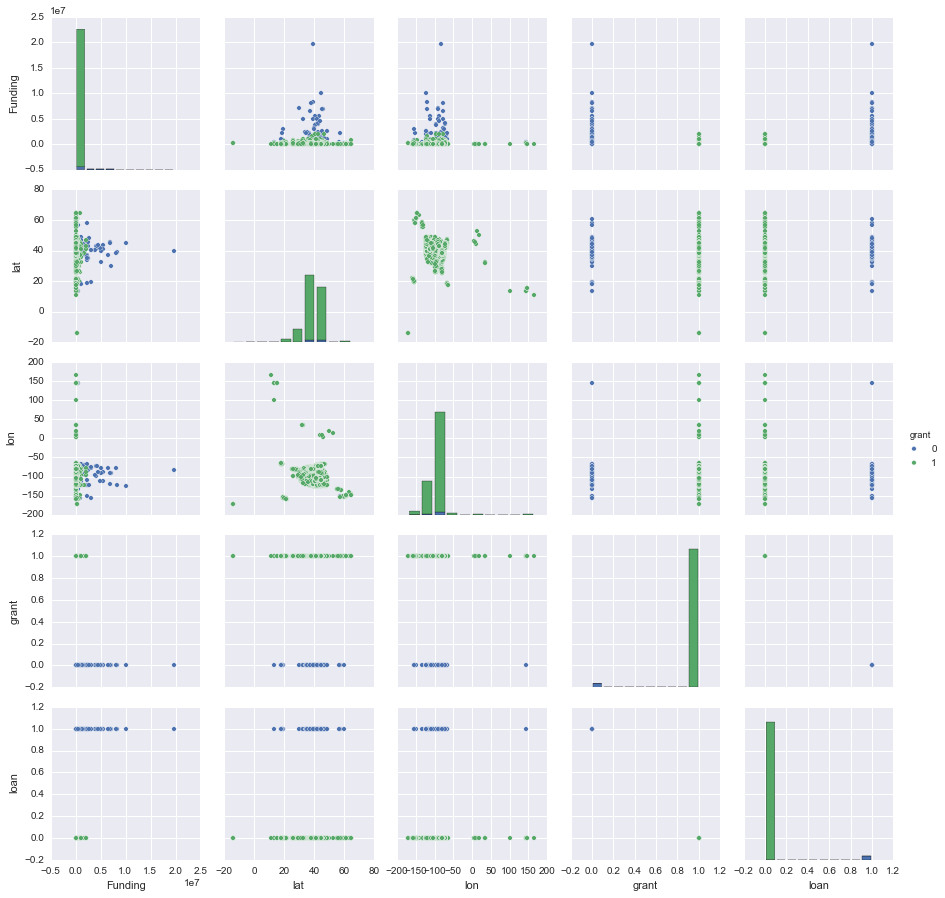

In [48]:
print matplotlib.__version__
pair_data_cols = ['Funding', 'lat', 'lon','grant','loan','Year']
kyf2_nums = kyf2[pair_data_cols]
# sns.pairplot(kyf2.iloc[:, :-14:], hue='grant_loan')

sns.pairplot(kyf2_nums, hue='grant')
# kyf2_nums

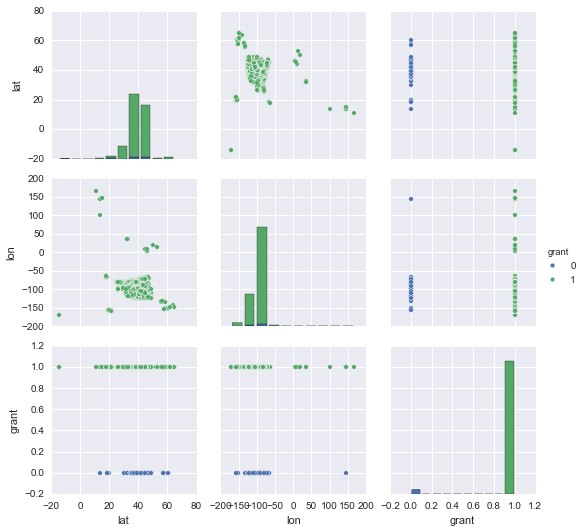

In [49]:
pair_data_cols = ['lat', 'lon', 'grant']
kyf2_nums = kyf2[pair_data_cols]
# sns.pairplot(kyf2.iloc[:, :-14:], hue='grant_loan')

sns.pairplot(kyf2_nums, hue='grant')

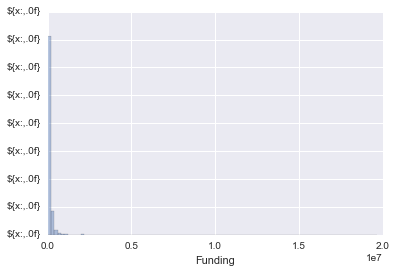

In [50]:
# # sns.plt.ticklabel_format(style='plain', axis='both',useOffset=False)
# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# # ax = plt.gca()
# fig, ax = plt.subplots(1, 1)

# # ax.xaxis.set_major_formatter(FormatStrFormatter('$%0.2f'))
# fmt = '${x:,.0f}'
# # tick = StrMethodFormatter(fmt)
# ax.xaxis.set_major_formatter(fmt)


from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('${x:,.0f}'))
sns.distplot(kyf2['Funding'], kde=False, bins =100)

In [51]:
pd.options.display.float_format = None

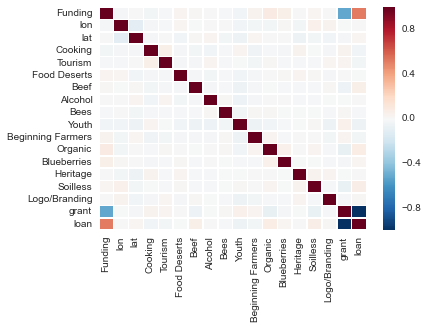

In [52]:
corr = kyf2.corr()
sns.heatmap(corr, linewidths= 0.25)

In [53]:
# Get two sample geocodes from each state
each_state = kyf2.groupby('State').head(2).loc[:, ["lat", 'lon']]
# sample_geo_2 = sample_geo.reset_index()

each_state['coords']=tuple(zip(each_state.lat, each_state.lon))
each_state_list = each_state['coords'].tolist()
each_state.head(6)
len(each_state)


116

In [54]:
# sample_states_geo = client.reverse(each_state_list, fields=['cd', 'stateleg', 'census'])

In [ ]:
sample_states_geo

In [ ]:
import pprint
details = []

for location in sample_states_geo:
    location = dict(location)
    pprint.pprint(location)
    type(location)
    print '\n\n'
    

In [62]:
def append_details(location):
    if not location['results']:
        location = {}
    location = sorted(location.get('results', {}), key = lambda item: item['accuracy'], reverse=True)
    if len(location) > 0:
        location = location[0]
    else:
        location = {}
    fields = location.get('fields', {})
    state_legislative_districts = dict(fields.get('state_legislative_districts', {}))
    ret = {
        "accuracy": location.get('accuracy', 0),
        "county": location.get('address_components', {}).get('county', ''),
        "state_fips": fields.get('census', {}).get('state_fips', ''),
        "place_fips": fields.get('census', {}).get('place_fips', ''),        
        "county_fips": fields.get('census', {}).get('county_fips', ''),
        "block_group": fields.get('census', {}).get('block_group', ''),
        "district_number": fields.get('congressional_district', {}).get('district_number', -1),
        "house_district_number": state_legislative_districts.get('house', {}).get('district_number', ''),
        "house_district_name": state_legislative_districts.get('house', {}).get('name', ''),
        "senate_district_number": state_legislative_districts.get('senate', {}).get('district_number', ''),
        "senate_district_name": state_legislative_districts.get('senate', {}).get('name', ''), 
        #"source": location.get('source', '')
    }
    return ret

In [63]:
details = []
for location in sample_states_geo:
    details.append(append_details(location))   

NameError: name 'sample_states_geo' is not defined

In [ ]:
details

In [ ]:
detail_df = pd.DataFrame(details)
len(detail_df)

In [56]:
#get lat/lon for each record
first1260 = kyf2.loc[:, ["lat", 'lon']]
# sample_geo_2 = sample_geo.reset_index()

first1260['coords']=tuple(zip(first1260.lat, first1260.lon))
first1260_list = first1260['coords'].tolist()
first1260.head(6)
len(first1260)

4176

In [57]:
first1260_geo = client.reverse(first1260_list, fields=['cd', 'stateleg', 'census'])

In [67]:
%store first1260_geo
first1260_geo.formatted_addresses[:10]

Stored 'first1260_geo' (LocationCollection)


[u'1300 E 5th Ave, Anchorage, AK 99501',
 u'1300 E 5th Ave, Anchorage, AK 99501',
 u'3650 E 17th Ave, Anchorage, AK 99508',
 u'442 W Evergreen Ave, Palmer, AK 99645',
 u'442 W Evergreen Ave, Palmer, AK 99645',
 u'1033 Sundown Ct, Anchorage, AK 99515',
 u'2359 Hawthorne Ct, Fairbanks, AK 99709',
 u'1649 S Glenn Hwy, Palmer, AK 99645',
 u'442 W Evergreen Ave, Palmer, AK 99645',
 u'949 Denali St, Anchorage, AK 99501']

In [60]:
for location in first1260_geo:
    location = dict(location)

In [64]:
details = []
for location in first1260_geo:
    details.append(append_details(location))

In [68]:
%store details
details[0:12]

Stored 'details' (list)


[{'accuracy': 1,
  'block_group': u'1',
  'county': u'Anchorage Municipality',
  'county_fips': u'02020',
  'district_number': 0,
  'house_district_name': u'State House District 20',
  'house_district_number': u'20',
  'place_fips': u'0203000',
  'senate_district_name': u'State Senate District J',
  'senate_district_number': u'J',
  'state_fips': u'02'},
 {'accuracy': 1,
  'block_group': u'1',
  'county': u'Anchorage Municipality',
  'county_fips': u'02020',
  'district_number': 0,
  'house_district_name': u'State House District 20',
  'house_district_number': u'20',
  'place_fips': u'0203000',
  'senate_district_name': u'State Senate District J',
  'senate_district_number': u'J',
  'state_fips': u'02'},
 {'accuracy': 1,
  'block_group': u'2',
  'county': u'Anchorage Municipality',
  'county_fips': u'02020',
  'district_number': 0,
  'house_district_name': u'State House District 19',
  'house_district_number': u'19',
  'place_fips': u'0203000',
  'senate_district_name': u'State Senate 

In [83]:
details_df = pd.DataFrame(details)


In [70]:
# Append the enriched data to the original know-your-farmer dataset
kyf_enriched = kyf2.join(details_df)

In [72]:
kyf_enriched.to_excel('kyf_enriched.xls')

In [73]:
# Get two sample geocodes from each state
kyf2_ll = kyf2[['lat', 'lon']]
kyf2_ll = kyf2_ll.reset_index()

kyf2_ll['coords']=tuple(zip(kyf2_ll.lat, kyf2_ll.lon))
kyf2_list = kyf2_ll['coords'].tolist()
kyf2_ll.head(6)
kyf2_list[0:2]


[(61.217559000000001, -149.85838000000001),
 (61.217559000000001, -149.85838000000001)]

In [101]:

# kyf2_ll_geo = client.reverse(kyf2_list, fields=['cd', 'stateleg','census'])

In [102]:
type(kyf2_ll_geo)

geocodio.data.LocationCollection

In [96]:
for kyf2_location in kyf2_ll_geo:
    kyf2_location = dict(kyf2_location)
kyf2_location


NameError: name 'kyf2_11_geo' is not defined

In [103]:
kyf_details = []
for kyf_location in kyf2_ll_geo:
    kyf_details.append(append_details(kyf2_location))

In [104]:
kyf_details[0:5]

[{'accuracy': 1,
  'block_group': u'3',
  'county': u'Goshen County',
  'county_fips': u'56015',
  'district_number': 0,
  'house_district_name': u'State House District 5',
  'house_district_number': u'5',
  'place_fips': u'5636060',
  'senate_district_name': u'State Senate District 3',
  'senate_district_number': u'3',
  'state_fips': u'56'},
 {'accuracy': 1,
  'block_group': u'3',
  'county': u'Goshen County',
  'county_fips': u'56015',
  'district_number': 0,
  'house_district_name': u'State House District 5',
  'house_district_number': u'5',
  'place_fips': u'5636060',
  'senate_district_name': u'State Senate District 3',
  'senate_district_number': u'3',
  'state_fips': u'56'},
 {'accuracy': 1,
  'block_group': u'3',
  'county': u'Goshen County',
  'county_fips': u'56015',
  'district_number': 0,
  'house_district_name': u'State House District 5',
  'house_district_number': u'5',
  'place_fips': u'5636060',
  'senate_district_name': u'State Senate District 3',
  'senate_district_n